In [2]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn style
sns.set(style="whitegrid")

# Load pickle files

In [3]:
PICKLE_DIR = 'pickle'

allocine_df = pd.DataFrame()

files = [file for file in os.listdir(PICKLE_DIR) if file.endswith(".pickle")]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

for file in files:
    path = os.path.join(PICKLE_DIR, file)
    print("Reading file: " + path)
    df = pd.read_pickle(path)
    allocine_df = allocine_df.append(df, ignore_index=True)
    
print()
print("Loaded {} reviews !".format(len(allocine_df)))

Reading file: pickle/allocine_0.pickle
Reading file: pickle/allocine_1.pickle
Reading file: pickle/allocine_2.pickle
Reading file: pickle/allocine_3.pickle
Reading file: pickle/allocine_4.pickle
Reading file: pickle/allocine_5.pickle
Reading file: pickle/allocine_6.pickle
Reading file: pickle/allocine_7.pickle
Reading file: pickle/allocine_8.pickle
Reading file: pickle/allocine_9.pickle
Reading file: pickle/allocine_10.pickle
Reading file: pickle/allocine_11.pickle
Reading file: pickle/allocine_12.pickle
Reading file: pickle/allocine_13.pickle
Reading file: pickle/allocine_14.pickle
Reading file: pickle/allocine_15.pickle
Reading file: pickle/allocine_16.pickle
Reading file: pickle/allocine_17.pickle
Reading file: pickle/allocine_18.pickle
Reading file: pickle/allocine_19.pickle
Reading file: pickle/allocine_20.pickle

Loaded 384079 reviews !


# Explore data

In [4]:
allocine_df.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
53894,http://www.allocine.fr/film/fichefilm-111632/critiques/spectateurs,1.0,"Sans grande surprise, le premier opus de la franchise (il en existe trois actuellement) est dépourvu d’originalité et d’un quelconque intérêt. Sexy Dance (2006) est ultra conventionnel, prévisible au bout de dix minutes et pour un film qui avoisine les 105 minutes, il y en a clairement 45 en trop, entre les répétitions inutiles, les séquences musicales et de danses à rallonges, les répliques mièvres, les disputes et les réconciliations, bref, une sortie en DTV aurait largement suffit ! Espérons que le second volet (2008) et le troisième (2010) seront relever le niveau.",2010-09-21,1,1
366314,http://www.allocine.fr/film/fichefilm-209558/critiques/spectateurs,3.5,"enfin un téléfilm Gulli qui traite des vacances ! un téléfilm très sympathique, bien joué et divertissant pour les moins de 12 ans.",2014-11-14,1,2
14939,http://www.allocine.fr/film/fichefilm-109788/critiques/spectateurs,5.0,"En voyant la multiplication de critiques négatives envers ce monument du cinéma modernes, j'ai re-regardé There Will Be Blood une troisième fois. Et le verdict est toujours le même, on est toujours face à une leçon magistrale de cinéma. Les acteurs sont plus qu'excellents (Day-Lewis comme à son habitude fait exploser le talentomètre, mais aussi le sous-estimé Paul Dano). Les dialogues sont écrits à la perfection. La réalisation est irréprochable, offre certains plans très beaux plans mais arrive à asseoir une ambiance angoissante et poisseuse, appuyé par la musique qui déroute au début mais arrive à nous influencer inconsciemment et instaurer chez le spectateur un profond malaise à certains moments (les dangers du métier de mineur dans une exploitation pétrolière sont parfaitement retranscris à l'écran). Cette ambiance sert une histoire passionnante, celle d'un exploitant misanthrope (de plus en plus détestable) sombrant dans la folie et qui ne cherche qu'une chose: être assez riche pour pouvoir vivre coupé du monde. Tout est parfait, rien que la scène de fin (grand moment, interrogation sur la foi religieuse, le dévoilement de la vraie nature des personnages principaux, le milk-shake, etc) devrait suffire nous faire aimer There Will Be Blood, ou au moins lui reconnaître ses indéniables qualités.",2017-01-11,3,0


## Negative reviews

We consider a review is negative when its associating rating is less than or equal to 2.0, which includes 4 categories: 0.5, 1.0, 1.5 and 2.0

In [5]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
320352,http://www.allocine.fr/film/fichefilm-131749/critiques/spectateurs,0.5,"Le film m'a semblé interminable, et pourtant il dure à peine 1h30.\r\nUne compilation de fausses bonnes idées, pour un scénario que mon neveu de 12 ans n'aurait aucun mal à écrire. Les personnages sont stupides, les situations convenues, et les dialogues désesperant.\r\nLa mise en scéne simplette ( alors qu'on sent le metteur en scéne tres content de lui ), et le charisme proche de celui d'une moule de l'acteur principal font de ce film un spectacle affligeant.",2009-02-02,0,1
332411,http://www.allocine.fr/film/fichefilm-41414/critiques/spectateurs,1.5,"Un film excessivement mauvais et très ennuyeux, c'est fâcheux.",2012-12-17,0,1
293009,http://www.allocine.fr/film/fichefilm-73848/critiques/spectateurs,0.5,Impossible d'accrocher tellement c'est mauvais...,2007-10-11,0,1


## Positive reviews

We consider a review is positive when its associating rating is greater than or equal to to 4.0, which includes 3 categories: 4.0, 4.5 and 5.0

In [6]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
153779,http://www.allocine.fr/film/fichefilm-242131/critiques/spectateurs,4.0,"Le film, porté par une Virginie Efira au sommet de son art, charme par la concision de sa mise en scène et la justesse des rapports entre mère et fils. \n\nLA SUITE :",2017-03-30,1,0
304158,http://www.allocine.fr/film/fichefilm-121048/critiques/spectateurs,5.0,"Quel que soit votre âge, si vieillir vous fait peur, courez vite voir ce film. Réalisé à Madrid par le cinéaste argentin Marcos Carnevale, ""Elsa & Fred"" est une merveilleuse histoire d'amour entre une adolescente de 82 ans, d'origine argentine, fofolle et menteuse, et un jeune veuf de 77 ans, au départ plutôt hypocondriaque. Ce qui se passe entre eux ainsi que les rapports qu'ils entretiennent avec leurs enfants nous entraînent dans un récit à la fois émouvant et drôle, jamais vulgaire. Ce film a un charme fou et les 2 acteurs, China Zorrilla et Manuel Alexandre, sont absolument parfaits. S'il y avait une justice dans le monde du cinéma, ce film dépasserait les 10 millions de spectateurs, avec 99 % de taux de satisfaction.",2006-12-20,0,0
108277,http://www.allocine.fr/film/fichefilm-105494/critiques/spectateurs,4.0,"Dans son premier long-métrage, Gaspar Noé nous plonge dans la descente aux enfers d'un personnage tellement empli de haine envers lui-même et le reste du monde que l'expérience de visionnage en devient un énorme choc, presque cathartique tellement le spectateur se noie dans un récit français engoncé dans la misère d'une humanité cruellement réaliste, mais autant désespérée et juste que particulièrement sordide et dépressive. Difficile donc de savoir quoi en tirer, la violence constante du personnage virant souvent dans le racisme et l'homophobie, ne nonobstant pas non plus le fait que nombre de séquences, voire une en particulier, ont réussi à complètement me déstabiliser, ce qui est assez rare pour être souligné. En bref, une expérience marquante mais volontairement provocatrice, et cela bien que Noé, avec son montage en coup de hachoir et une capacité très palpable à créer des atmosphères étouffantes et sensitives (les scènes finales par exemple sont une fantastique démonstration de comment instiguer une complète perte de repère qui dérange et déstabilise le spectateur), laisse toutefois une marque indéniable dans le cinéma français. Et laisser une marque, bien évidemment que Gaspar Noé le fait dès son premier long-métrage, à l'époque bien remarqué avec le « Prix Très Spécial » du Festival de Cannes de la même année. Abandonnez ainsi tout autre candidat, Seul Contre Tous est peut-être le film le plus nihiliste des années 90.",2017-03-01,3,0


## Rating counts

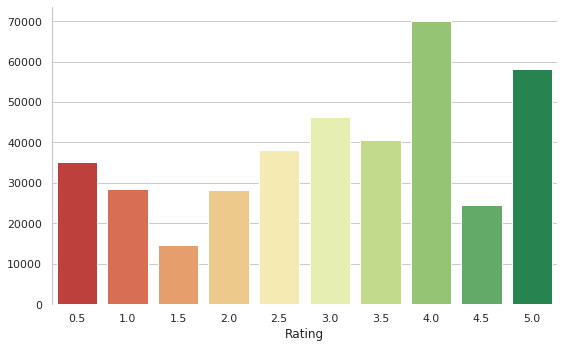

In [7]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/rating_counts.png', dpi=200)

## Polarity

In [8]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

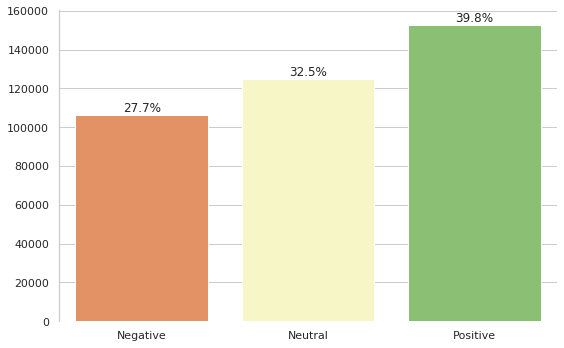

In [9]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/polarity_frequency.png', dpi=200)

## Reviews per year

In [10]:
allocine_df['date'] = pd.to_datetime(allocine_df['date'])
reviews_per_year = allocine_df.groupby(allocine_df['date'].dt.year).size()

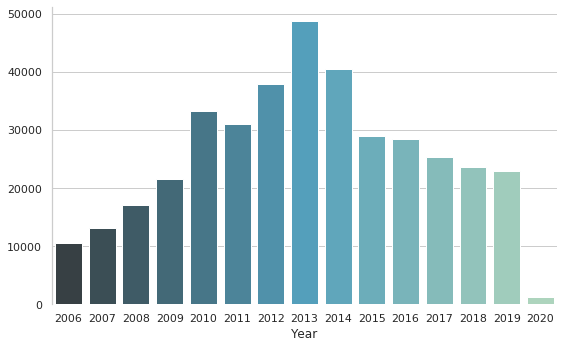

In [11]:
plt.figure(figsize=(8,5))
ax = sns.barplot(reviews_per_year.index, reviews_per_year.values, palette="GnBu_d")
ax.set(xlabel='Year', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_per_year.png', dpi=200)

## Reviews length

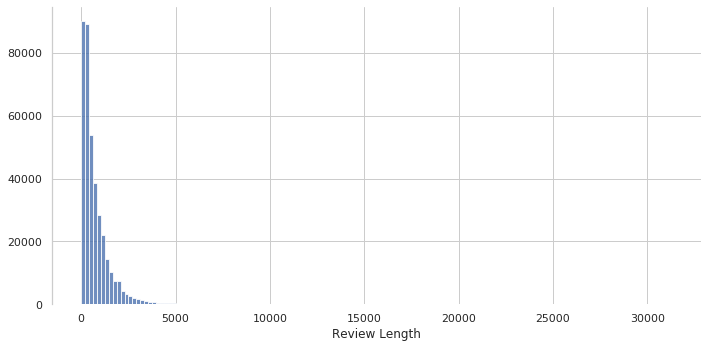

In [12]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/reviews_length.png', dpi=200)

In [16]:
THRESHOLD = 2000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

24247 reviews with LEN > 2000 (6.31 % of total data)


Example of a long review

In [17]:
long_reviews.head(1)

,film-url,rating,review,date,helpful,unhelpful,polarity
1,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs,5.0,"Avril 1917. La guerre fait rage. Dans le Pas de Calais, les forces britanniques se sont terrées dans les tranchées face aux forces allemandes.\nDeux soldats britanniques sont mandatés à travers les lignes ennemies pour aller de toute urgence délivrer un message à un bataillon dont l’engagement pourrait lui être fatal.\n\nSam Mendes fait fort. Après ""American Beauty"", ""Les Noces rebelles"", ""Skyfall"", le réalisateur britannique signe son film le plus personnel tiré, dit-il des souvenirs distillés par son grand-père paternel, caporal dans l’armée britannique pendant la Première Guerre mondiale.\n\nIl le fait dans une forme intimidante, qui force le respect : l’unique plan séquence. C’est le Graal des réalisateurs qui répond tout à la fois à un défi technique et scénaristique. Le défi technique, on le conçoit aisément, rendu plus facile à surmonter avec la miniaturisation des caméras. Le défi scénaristique consiste à raconter en temps réel une histoire.\n\nLes encyclopédies de cinéma listent les plans séquences les plus célèbres : la première scène de ""La Soif du mal"" de Orson Welles ou de Snake Eyes de Brian de Palma. Les revues de cinéma essaient d’en faire le hit parade, celui des ""Fils de l’Homme"" d’Alfonso Cuaron étant souvent cité parmi les plus époustouflants. Et puis, évidemment, il y a ""La Corde"" de Hitchcock, tourné en huis clos donnant l’impression d’un unique plan séquence (en fait, à l’époque, les bobines ne permettaient pas de tourner pendant plus de dix minutes et La Corde est constitué de dix séquences).\n\nOn voit récemment se multiplier, avec plus ou moins de bonheur, ce genre d’exercices. ""Victoria"" en 2015 suivait son héroïne dans les rues de Berlin. ""Utøya, 22 juillet"" l’an dernier racontait en temps réel la tuerie d’Utøya en Norvège du point de vue d’une jeune fille pourchassée par Anders Breivik.\n\nLa prouesse technique est en elle-même bluffante. Mais elle serait vaine si elle ne servait pas une cause. L’idée est de nous plonger dans la furie de la guerre, de nous faire sentir jusqu’à l’épuisement l’exténuation de deux soldats confrontés à une tâche titanesque : risquer leur vie, traverser l’enfer, vaincre la peur et la souffrance pour accomplir leur mission.\nLe pari est réussi. On sort de la salle lessivé, après deux heures passées les ongles plantés dans l’accoudoir à retenir son souffle. Comme à la lecture des premières pages du roman de Pierre Lemaître ""Au revoir là-haut"", on aura vécu organiquement le bruit et la fureur, le sang et la merde, la sueur et les larmes. Chapeau l’artiste.",2020-01-15,11,3,1


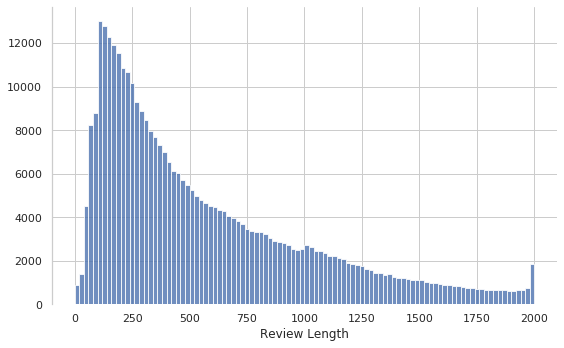

In [18]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
fig.savefig('img/short_reviews_length.png', dpi=200)

In [ ]:
# TODO: other analysis ?
# Histograms of reviews lengths for each rating (negative reviews are shorter ?)

In [ ]:
# Num reviews per film ? => why are we limiting to 30 reviews per film ?

# Build dataset

In [20]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 384079


## Remove data we don't need 

In [21]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [22]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 2000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
"""
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))
"""
# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 259210 (-32.5 %)
Length: 243427 (-6.1 %)
Total loss: (-36.6 %)


In [23]:
# Change -1 to 0 for negative polarity
dataset_df.loc[dataset_df['polarity'] == -1, 'polarity'] = 0

In [24]:
dataset_df.groupby('polarity').size()

polarity
0    101351
1    142076
dtype: int64

## Clean review text

In [25]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

## Remove empty reviews

In [26]:
# Remove reviews with less than 3 characters
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['review'].str.len() > 2]

In [27]:
dataset_df.sample(5, random_state=42)

,film-url,review,polarity
315559,http://www.allocine.fr/film/fichefilm-58484/critiques/spectateurs,"Le titre français est vraiment en dessous du titre original, qui joues plus en effet sur cette histoire de destin qui doit arriver, et qui arrivera ?? Un très bon Guy Pearce de 2006 qui vaut le visionnage : personnellement je ne le connaissais pas à cette époque, et je suis bien content de voir cet acteur dans le rôle du vrai ""connard"" qui commence à perdre pied et à ne plus savoir ce qui va lui arriver. Entre fantastique et thriller, on passe par plusieurs possibilités scénaristiques qui nous amène à vouloir anticiper la fin, la première neige, mais sans y arriver ! Une bonne surprise à voir !",1
126095,http://www.allocine.fr/film/fichefilm-36285/critiques/spectateurs,"J'adore ce film , il y a un petit quelque chose qui a fait que j'ai eu un coup de coeur pour ce film .",1
140730,http://www.allocine.fr/film/fichefilm-14704/critiques/spectateurs,"L'affiche, scandale absolu à l'époque, reste encore dans toutes les mémoires : Larry Flynt allongé en forme de crucifix sur le bas-ventre d'une femme avec le drapeau américain en couche-culotte ! Avec ""Larry Flynt"" qu'il réalise en 1996, Milos Forman semble exprimer mieux que dans nulle autre film sa passion pour les personnages hors-normes, atypiques et exubérants. Cette biographie du sulfureux créateur du magazine Huslter, interprété par un génial Woody Harrelson permet par-dessus tout d'observer une nouvelle fois la maîtrise du réalisateur tchèque lorsqu'il s'essaye au genre. Pourvu d'un sens du rythme toujours aussi implacable, celui-ci arrive donc à nous passionner pendant deux heures devant un sujet et un protagonistes sur lesquels on aurait pu avoir des doutes. Mais lorsqu'on se penche sur ""Larry Flynt"", c'est surtout l'autodérision qui semble de rigueur et qu'il convient de prendre soigneusement en compte ; ainsi le vrai Larry Flynt effectue une courte apparition dans le film en jouant le rôle... du juge qui l'a fait condamner ! Jouissif.",1
14897,http://www.allocine.fr/film/fichefilm-146630/critiques/spectateurs,"Vraiment le film surpise de cette fin d'année. Les films dits ""catastrophe"" se faisaient rare ces derniers temps. Et celui-ci revient sur un évènement particulièrement marquant de ces dernières années. La prise de recul par rapport à l'évènement, le réalisme de la reconstitution, et le jeu parfait de ses interprètes en font une vrai réussite. Malgré l'issue finale connue d'avance, le suspens est présent et la mise en abime dans l'évènement est particulièrement prenante. On effleure malgré tout seulement le vrai drame vécu par beaucoup d'autres familles.",1
128206,http://www.allocine.fr/film/fichefilm-28363/critiques/spectateurs,"Une histoire intéressante qui aurais pu donner lieu à quelque chose de réellement pertinent mais non, au lieu de cela on a un film assez brouillon, mal fichu, long et pénible à visionner. Ni épouvante ni horreur ne sont présent dans ""13 fantômes"". Rajoutez à cela des acteurs moyens, une absence totale de suspense et de séquences effrayantes ainsi que des dialogues vides et on obtient un film des plus simplistes, ennuyeux et ridicule. Chose vraiment dommage puisque certaines séquences et agencements sont intéressants, de bonnes idées sont présentes et les effets spéciaux sont plutôt bien réussis. Mais le reste ne suit malheureusement pas... En somme, un film très mauvais dont on peux largement se passer de visionner et dont on ne retiendra pas grand chose tant on ne s'y accroche pas.",0


## Balance classes

In [28]:
# The overall distribution of labels is balanced (25k pos and 25k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = 10000
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

In [29]:
print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=42)

polarity
0    10000
1    10000
dtype: int64


,film-url,review,polarity
202700,http://www.allocine.fr/film/fichefilm-139455/critiques/spectateurs,"Je n'ai pas lu le pavé, qui avait l'air pourtant très intéressant mais un peu gros, rédigé par Naomi Klein. Ça ne parlera donc que du film et non pas de son ouvrage. ""La stratégie du Choc"" se positionne comme étant véritable plaidoyer contre notre société capitaliste actuelle et ce depuis le début du siècle. Michael Winterbottom et Mat Whitecross réalisent ce documentaire et avaient déjà un autre documentaire choc : ""The Road To Guantanamo"" duquel des images sont d'ailleurs extraites. Le propos est percutant, des notions, cependant de politique extérieure et d'économie semblent être requises pour comprendre parfaitement le sujet. Pourtant la narration est faite de telle sorte qu'un quidam, avec un peu de connaissance, comprend l'analyse de Klein, c'est clair ! Une attaque contre les théories ultralibérales de Milton Friedman. L'Histoire économique est retracée depuis le coup d'Etat de Pinochet au Chili qui a appliqué la doctrine des Chicago Boys et de Milton Friedman jusqu'au Crack boursier et la crise financière de 2008 en passant par le 11 septembre et les guerres d'Afghanistan et d'Irak sans oublier de parler de la politique libérale instaurée par Thatcher. Naomi Klein nous explique ce qu'est la Stratégie du Choc et comment réussir à faire croire que le système libéral est le meilleur système économique qu'il puisse exister. Le film est découpé en plusieurs chapitres démontrant les différentes Stratégies, celle de la guerre, celle de la lutte contre le terrorisme... instaurant la peur. La peur permettant de manipuler les esprits plus facilement. Elle propose des solutions, la première et la plus essentielle est [... La suite sur http://oranou59.blogspot.com/2010/03/film-la-strategie-du-choc.html]",1
38981,http://www.allocine.fr/film/fichefilm-257569/critiques/spectateurs,L'histoire de ce jeune chef mi chinois mi japonais est absolument bouleversante..retrouver le souvenir d'une maman disparue trop tôt à travers une multitude d'émotions est juste incroyable.. on en sort ému avec certainement un lot de souvenirs et de tendresse qui nous font un bien fou..allez-y ne ratez pas de vivre de si beaux moments..,1
166510,http://www.allocine.fr/film/fichefilm-226990/critiques/spectateurs,Un magnifique film pour petits et grands. L'aiglon et ensuite l'aigle sont splendides et attendrissants. Les paysages sont superbes. Bref une histoire hautement recommandable.,1
20303,http://www.allocine.fr/film/fichefilm-253601/critiques/spectateurs,"Un film magnifique qui met en valeur tout le pouvoir de la parole et tout ce qu'elle représente : des idées, la liberté, des combats, la beauté... On reprend conscience à quel point la parole et la façon de s'en servir détient un pouvoir très puissant. En plus de défendre des idées, la parole est aussi une façon de voyager à travers des sonorités, des rimes, des intonations. En fait, elle peut être entreprise différemment selon chacun. Ce que l'on en retient c'est que la capacité à bien s'exprimer génère un impact sur notre quotidien et peut changer une vie.",1
265490,http://www.allocine.fr/film/fichefilm-26170/critiques/spectateurs,"L'une des oeuvres majeures des Marx Brothers! L'un des gags les plus cèlèbres du 7ème art se retrouve dans une sèquence myhtique de ""A Night at the Opera"". Le film nous les montre d'abord sur un transatlantique! Groucho fait apporter dans sa minuscule cabine une malle si grande que la première rèflexion du porteur est: ""Faut-il la mettre dans la cabine ou la cabine dans la malle ?"" Mais ce n'est pas fini, puisque la cabine va finalement contenir: les trois frères, Allan Jones, deux grandes femmes de chambre, un plombier, une manucure (indispensable au confort de Groucho), une dame qui cherche sa tante Minnie, une ènorme femme de mènage, tandis que des garçons vont et viennent, prenant commandes, lesquelles s'achèvent règulièrement sur ""Et un oeuf dur!"", criè par Ch

## Split train/val/test

In [30]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

total_size = len(balanced_df)

train_df = balanced_df.copy()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

while True:
    row = train_df.sample(1, random_state=42)
    url = row['film-url'].iloc[0]
    rows = train_df[train_df['film-url'] == url]
    if(len(val_df) < VAL_RATIO * total_size):
        val_df = val_df.append(rows)
        train_df = train_df[train_df['film-url'] != url]        
    elif(len(test_df) < TEST_RATIO * total_size):
        test_df = test_df.append(rows)
        train_df = train_df[train_df['film-url'] != url]
    else:
        break

# Shuffle dataframes & reset indexes
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
print("LEN TRAIN: " + str(len(train_df)))
print("LEN VAL: " + str(len(val_df)))
print("LEN TEST: " + str(len(test_df)))

LEN TRAIN: 12000
LEN VAL: 4000
LEN TEST: 4000


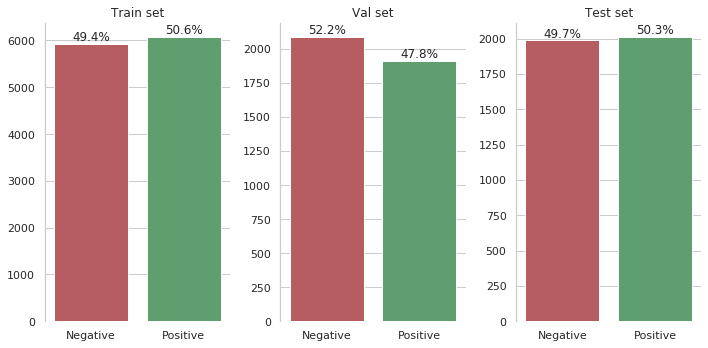

In [31]:
splits = [train_df, val_df, test_df]
titles = ["Train set", "Val set", "Test set"]

fig, ax = plt.subplots(1, len(splits), sharex=True, figsize=(10,5))
for i, (data, title) in enumerate(zip(splits, titles)):
    sns.countplot(data=data, x='polarity', palette=["r", "g"], ax=ax[i])
    ax[i].set(xlabel='', ylabel='')
    ax[i].set_xticklabels(['Negative', 'Positive']) 
    ax[i].set_title(title)
    
    # Frequencies
    ncount = len(data)
    for p in ax[i].patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig.savefig('img/splits_polarity.png', dpi=200)

# Export

## To pickle

In [32]:
DATA_DIR = 'data'

In [33]:
import pickle

out_dict = {
    'train_set': train_df,
    'val_set': val_df,
    'test_set': test_df,
    'class_names': {-1: 'Negative', 
                    1: 'Positive'}    
}

pickle_file = os.path.join(DATA_DIR, "allocine_dataset.pickle")
with open(pickle_file, 'wb') as writer:
    pickle.dump(out_dict, writer)

In [34]:
with open(pickle_file, 'rb') as reader:
    data = pickle.load(reader)
    
print("LEN TRAIN: "+ str(len(data["train_set"])))
print("LEN VAL: "+ str(len(data["val_set"])))
print("LEN TEST: "+ str(len(data["test_set"])))

LEN TRAIN: 12000
LEN VAL: 4000
LEN TEST: 4000


## To Jsonlines

In [35]:
import jsonlines

splits = [train_df, val_df, test_df]
files = ["train.jsonl", "val.jsonl", "test.jsonl"]

for split, file in zip(splits, files):
    export_file = os.path.join(DATA_DIR, file)
    with jsonlines.open(export_file, mode='w') as writer:
        for index, row in split.iterrows():        
            writer.write({
                "film-url": row["film-url"],
                "review": row["review"],
                "polarity": row["polarity"]
            })

## Create archive

In [36]:
import tarfile

with tarfile.open("data.tar.bz2", "w:bz2") as tar:
    tar.add(DATA_DIR, arcname=os.path.basename(DATA_DIR))